# Task

Predict each player’s on-base percentage at the end of the 2019 season given his batting statistics in March/April 2019. You are to use the first 28 columns to create your prediction and the final column, FullSeason_OBP to test your prediction accuracy.

# EDA

In [1]:
# Load data
import pandas as pd
df = pd.read_csv("batting.csv")
df.head()

,playerid,Name,Team,MarApr_PA,MarApr_AB,MarApr_H,MarApr_HR,MarApr_R,MarApr_RBI,MarApr_SB,...,MarApr_FB%,MarApr_IFFB%,MarApr_HR/FB,MarApr_O-Swing%,MarApr_Z-Swing%,MarApr_Swing%,MarApr_O-Contact%,MarApr_Z-Contact%,MarApr_Contact%,FullSeason_OBP
0,15998,Cody Bellinger,LAD,132,109,47,14,32,37,5,...,36.1%,5.7%,40.0%,22.6%,66.0%,40.7%,81.1%,88.4%,86.0%,0.406
1,11477,Christian Yelich,MIL,124,102,36,14,26,34,6,...,41.0%,11.8%,41.2%,27.9%,72.4%,44.8%,56.6%,87.8%,75.7%,0.429
2,17975,Scott Kingery,PHI,35,32,13,2,5,6,1,...,33.3%,0.0%,22.2%,40.2%,74.5%,53.5%,54.3%,85.4%,71.1%,0.315
3,7927,Eric Sogard,TOR,49,43,17,3,8,9,2,...,40.5%,0.0%,20.0%,27.3%,50.5%,37.3%,93.9%,97.8%,96.2%,0.353
4,14130,Daniel Vogelbach,SEA,92,71,22,8,15,16,0,...,51.9%,7.4%,29.6%,23.7%,48.8%,33.7%,66.1%,82.7%,75.7%,0.341


In [2]:
df.shape

(320, 29)

## Data Cleaning

- Some columns represented as percentages are of type string. These must be converted floats to before any modeling can occur. The function below that converts string percents to floats was pulled from the following [link](https://stackoverflow.com/questions/12432663/what-is-a-clean-way-to-convert-a-string-percent-to-a-float).

In [3]:
def p2f(x): 
    return x.apply(lambda x: round(float(x.strip('%'))/100,4))

In [4]:
percent_cols = ["MarApr_BB%", "MarApr_K%", "MarApr_LD%", "MarApr_GB%", "MarApr_FB%", "MarApr_IFFB%", "MarApr_HR/FB", "MarApr_O-Swing%", "MarApr_Z-Swing%", "MarApr_Swing%", "MarApr_O-Contact%", "MarApr_Z-Contact%", "MarApr_Contact%"]

In [5]:
for i in percent_cols:
    df[i] = p2f(df[i])

- Runs and Stolen Base are statistics do no contribute to a batter getting on base. Rather they are a result that occurs once the batter has already gotten on base. Because of this I decided to remove them from the dataset.

In [6]:
drop_cols = ["MarApr_R", "MarApr_SB"]
df = df.drop(columns=drop_cols)
df.columns

Index(['playerid', 'Name', 'Team', 'MarApr_PA', 'MarApr_AB', 'MarApr_H',
       'MarApr_HR', 'MarApr_RBI', 'MarApr_BB%', 'MarApr_K%', 'MarApr_ISO',
       'MarApr_BABIP', 'MarApr_AVG', 'MarApr_OBP', 'MarApr_SLG', 'MarApr_LD%',
       'MarApr_GB%', 'MarApr_FB%', 'MarApr_IFFB%', 'MarApr_HR/FB',
       'MarApr_O-Swing%', 'MarApr_Z-Swing%', 'MarApr_Swing%',
       'MarApr_O-Contact%', 'MarApr_Z-Contact%', 'MarApr_Contact%',
       'FullSeason_OBP'],
      dtype='object')

- The playerid column is currently an integer and since no calculations will be performed on this column it should be converted to a string.

In [7]:
def int2str(x): 
    return x.apply(lambda x: str(x))

In [8]:
df["playerid"] = int2str(df["playerid"])
df["playerid"]

0      15998
1      11477
2      17975
3       7927
4      14130
       ...  
315    12984
316     9253
317    16357
318     6848
319    16623
Name: playerid, Length: 320, dtype: object

## Feature Engineering

- The dataset includes enough statistics that not much feature engineering should be required. However, given hitter BB% and K%, it could be potentially useful to generate the raw BB and K counts. This could be redundant when passing inputs into the model but that will be evaluated at a later time. 

- BB% and K% are calculated using plate appearances, so I will multiply those percentages by PA to get the BB and K raw counts

In [9]:
df["MarApr_BB"] = round(df["MarApr_BB%"] * df["MarApr_PA"])
df["MarApr_BB"]

0      19.0
1      20.0
2       1.0
3       5.0
4      20.0
       ... 
315     9.0
316     4.0
317     3.0
318     1.0
319     2.0
Name: MarApr_BB, Length: 320, dtype: float64

In [10]:
df["MarApr_K"] = round(df["MarApr_K%"] * df["MarApr_PA"])
df["MarApr_K"]

0      15.0
1      20.0
2       5.0
3       5.0
4      20.0
       ... 
315    30.0
316    19.0
317    14.0
318     8.0
319    14.0
Name: MarApr_K, Length: 320, dtype: float64

## Plots

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

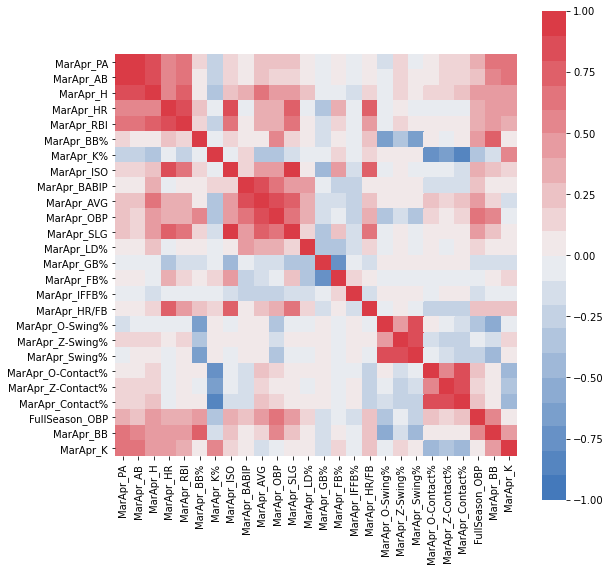

In [12]:
f, ax = plt.subplots(figsize=(9,9))
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(250, 10, n=20),
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='center'
);

- Base on some high/low correlations, plotting some histograms of these variables will display their distributions 
<br>
&nbsp; - FullSeason_OBP
<br>
&nbsp; - MarApr_OBP
<br>
&nbsp; - MarApr_BB
<br>
&nbsp; - MarApr_O-Swing%
<br>
&nbsp; - MarApr_SLG
<br>
&nbsp; - MarApr_AVG
<br>
&nbsp; - MarApr_H
<br>
&nbsp; - MarApr_BB%

Text(0, 0.5, 'Player Count')

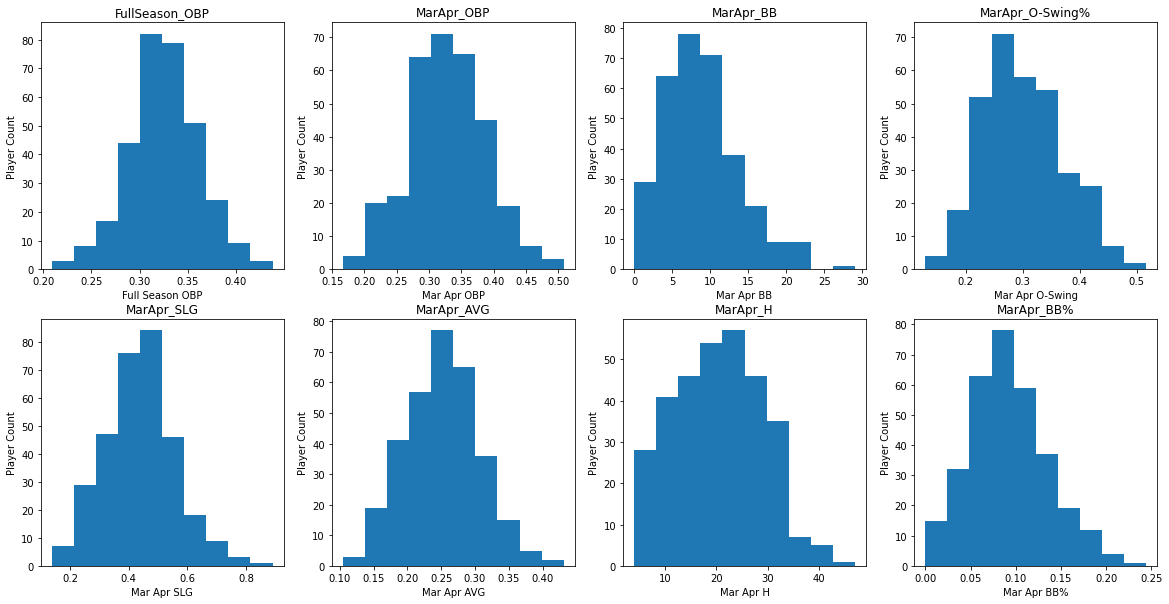

In [13]:
plt.figure(figsize=(20,10))

# full season obp
ax1 = plt.subplot(241)
ax1.hist(df['FullSeason_OBP'])
ax1.set_title('FullSeason_OBP')
ax1.set_xlabel("Full Season OBP")
ax1.set_ylabel("Player Count")

# ma obp
ax2 = plt.subplot(242)
ax2.hist(df['MarApr_OBP'])
ax2.set_title('MarApr_OBP')
ax2.set_xlabel("Mar Apr OBP")
ax2.set_ylabel("Player Count")

# ma bb
ax3 = plt.subplot(243)
ax3.hist(df['MarApr_BB'])
ax3.set_title('MarApr_BB')
ax3.set_xlabel("Mar Apr BB")
ax3.set_ylabel("Player Count")

# ma o-swing
ax4 = plt.subplot(244)
ax4.hist(df['MarApr_O-Swing%'])
ax4.set_title('MarApr_O-Swing%')
ax4.set_xlabel("Mar Apr O-Swing")
ax4.set_ylabel("Player Count")

# ma slg
ax5 = plt.subplot(245)
ax5.hist(df['MarApr_SLG'])
ax5.set_title('MarApr_SLG')
ax5.set_xlabel("Mar Apr SLG")
ax5.set_ylabel("Player Count")

# ma avg
ax6 = plt.subplot(246)
ax6.hist(df['MarApr_AVG'])
ax6.set_title('MarApr_AVG')
ax6.set_xlabel("Mar Apr AVG")
ax6.set_ylabel("Player Count")

# ma obp
ax7 = plt.subplot(247)
ax7.hist(df['MarApr_H'])
ax7.set_title('MarApr_H')
ax7.set_xlabel("Mar Apr H")
ax7.set_ylabel("Player Count")

# ma bb%
ax8 = plt.subplot(248)
ax8.hist(df['MarApr_BB%'])
ax8.set_title('MarApr_BB%')
ax8.set_xlabel("Mar Apr BB%")
ax8.set_ylabel("Player Count")

- In general, most of the slected variables display a normal distribution. MarApr Hits and BB seems to be the only varibales that are certainly not normally distributed.

# Data Splitting

## Normalize the Data

- Separate input and output variables. 

In [14]:
# separate inputs and outputs
output = df.loc[:,'FullSeason_OBP']
inputs = df.loc[:,df.columns != 'FullSeason_OBP']
inputs = inputs.iloc[:,3:] # remove playerid, name, team
inputs.head()

,MarApr_PA,MarApr_AB,MarApr_H,MarApr_HR,MarApr_RBI,MarApr_BB%,MarApr_K%,MarApr_ISO,MarApr_BABIP,MarApr_AVG,...,MarApr_IFFB%,MarApr_HR/FB,MarApr_O-Swing%,MarApr_Z-Swing%,MarApr_Swing%,MarApr_O-Contact%,MarApr_Z-Contact%,MarApr_Contact%,MarApr_BB,MarApr_K
0,132,109,47,14,37,0.144,0.114,0.459,0.398,0.431,...,0.057,0.400,0.226,0.660,0.407,0.811,0.884,0.860,19.0,15.0
1,124,102,36,14,34,0.161,0.161,0.451,0.319,0.353,...,0.118,0.412,0.279,0.724,0.448,0.566,0.878,0.757,20.0,20.0
2,35,32,13,2,6,0.029,0.143,0.313,0.440,0.406,...,0.000,0.222,0.402,0.745,0.535,0.543,0.854,0.711,1.0,5.0
3,49,43,17,3,9,0.102,0.102,0.302,0.400,0.395,...,0.000,0.200,0.273,0.505,0.373,0.939,0.978,0.962,5.0,5.0
4,92,71,22,8,16,0.217,0.217,0.423,0.318,0.310,...,0.074,0.296,0.237,0.488,0.337,0.661,0.827,0.757,20.0,20.0


In [15]:
output.head()

0    0.406
1    0.429
2    0.315
3    0.353
4    0.341
Name: FullSeason_OBP, dtype: float64

- After splitting the data for modeling, the feature data must be normalized since all variables do not have the same range. I used prepackaged normalization method found [here](https://www.journaldev.com/45109/normalize-data-in-python). The predicted variable should not be normalized to predict scaled OBP variables, insteead of mormalized OBP values.

In [17]:
from sklearn import preprocessing
inputs_norm = pd.DataFrame(preprocessing.normalize(inputs))
inputs_norm.columns = inputs.columns
inputs_norm.head()

,MarApr_PA,MarApr_AB,MarApr_H,MarApr_HR,MarApr_RBI,MarApr_BB%,MarApr_K%,MarApr_ISO,MarApr_BABIP,MarApr_AVG,...,MarApr_IFFB%,MarApr_HR/FB,MarApr_O-Swing%,MarApr_Z-Swing%,MarApr_Swing%,MarApr_O-Contact%,MarApr_Z-Contact%,MarApr_Contact%,MarApr_BB,MarApr_K
0,0.719370,0.594026,0.256139,0.076297,0.201642,0.000785,0.000621,0.002501,0.002169,0.002349,...,0.000311,0.002180,0.001232,0.003597,0.002218,0.004420,0.004818,0.004687,0.103546,0.081747
1,0.725253,0.596579,0.210557,0.081883,0.198860,0.000942,0.000942,0.002638,0.001866,0.002065,...,0.000690,0.002410,0.001632,0.004235,0.002620,0.003310,0.005135,0.004428,0.116976,0.116976
2,0.701660,0.641517,0.260616,0.040095,0.120285,0.000581,0.002867,0.006275,0.008821,0.008139,...,0.000000,0.004451,0.008059,0.014935,0.010725,0.010886,0.017120,0.014254,0.020047,0.100237
3,0.715978,0.628307,0.248401,0.043835,0.131506,0.001490,0.001490,0.004413,0.005845,0.005772,...,0.000000,0.002922,0.003989,0.007379,0.005450,0.013720,0.014290,0.014057,0.073059,0.073059
4,0.748368,0.577545,0.178958,0.065076,0.130151,0.001765,0.001765,0.003441,0.002587,0.002522,...,0.000602,0.002408,0.001928,0.003970,0.002741,0.005377,0.006727,0.006158,0.162689,0.162689


- Split data into train, validation, and testing data

In [18]:
from sklearn.model_selection import train_test_split

# split train and test
x_train, x_test, y_train, y_test = train_test_split(inputs, output, test_size=0.2, shuffle = True, random_state = 3)
# split train and validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, shuffle = True, random_state= 3) 

# check shapes
print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("x_val shape: {}".format(x_val.shape))
print("y val shape: {}".format(y_val.shape))
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

x_train shape: (192, 25)
y_train shape: (192,)
x_val shape: (64, 25)
y val shape: (64,)
x_test shape: (64, 25)
y_test shape: (64,)


# Modeling

## Gradient Boosting Regression (XGBoost)

- The first model I decided to use was XGBoost Regression. XGBoost is boosting algorithm that learns off of itself, generating an ensemble of tree models to optimize the loss function. 
- The [scikit-learn](https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html) Gradient Boosting regression documentation was used to develop the model.

### Train Model

The mean squared error (MSE) on validation set: 0.00079


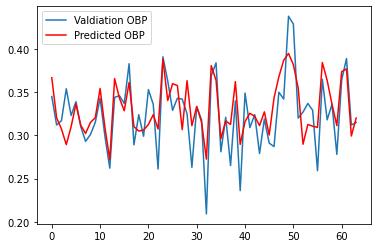

In [19]:
from sklearn import ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error

# establish parameters
params = {
    "n_estimators": 500,
    "max_depth": 3,
    "min_samples_split": 2,
    "learning_rate": 0.01,
    
}

# fit model
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(x_train, y_train)

# evaluate model
mse = mean_squared_error(y_val, reg.predict(x_val))
print("The mean squared error (MSE) on validation set: {:.5f}".format(mse))
import numpy as np

plt.plot(np.asarray(y_val), label="Valdiation OBP")
plt.plot(reg.predict(x_val), c="red", label="Predicted OBP")
plt.legend()

- The mean sqaured error (MSE) on the validation set was 8e-4.
- The model seemed to struggle with outliers (OBP<.275 or OBP>.375)

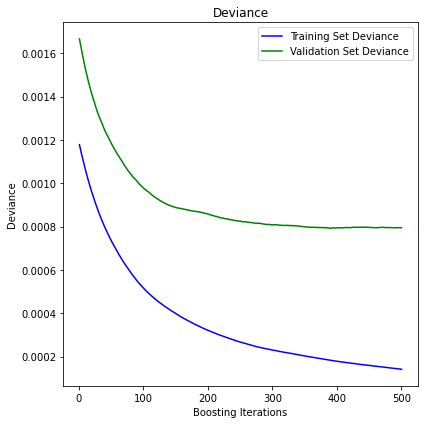

In [20]:
val_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(x_val)):
    val_score[i] = reg.loss_(y_val, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, val_score, "g-", label="Validation Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

- A good sign of this trained model is the deviance of the train and validation sets. The validation deviance mimics the decrease of the train set and then begins to tail off and flatten out which is a good indicator of the number of iterations needed. 

#### Parameter Tuning

- The parameter that had the most influence on the model was the **learning rate**. Originally, the learning rate was set to 0.001 which resulted in the model pretty much predicting a straight line average of the validation set. The model significantly improved once it was increased by an order of magnitude to 0.01.
- The model's validation performance begins to flat line between 450-500 boosting iterations. Because of this, the **number of estimators** parameter was set to 500.
- With a limited training data set, both the number of **samples to split a node** and the **depth of nodes within the tree model** had to be set to a small value to implify the model before MSE increased significantly. Both parameters were set to their default, minimum values.

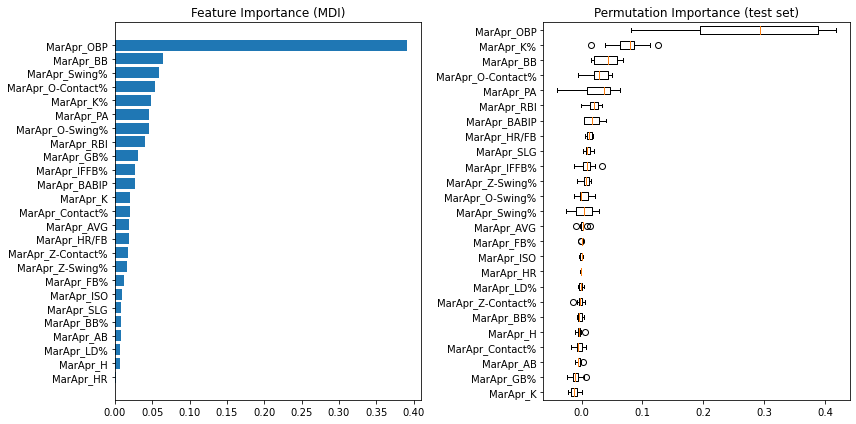

In [21]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(inputs.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    reg, x_val, y_val, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(inputs.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

#### Feature Importance

- To no surprise, **March and April OBP** is the most important feature in the model. In fact it is over 4 times as important as the next important feature which invloves **March and April BB**.
- The other three variables that complete the top 5 most important variables are **Swing %, out-of-zone contact %,** and **strikeout %**.
- In addition, based on the permutation importance boxplot, **K%** could also be considered and important feature along with the variables mentioned above.

### Test Model

The mean squared error (MSE) on test set: 0.00114


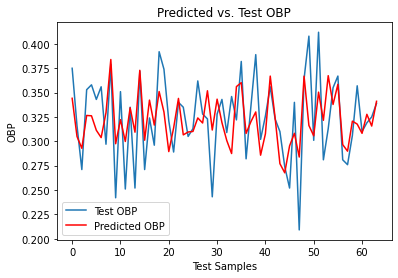

In [22]:
# evaluate model
mse = mean_squared_error(y_test, reg.predict(x_test))
print("The mean squared error (MSE) on test set: {:.5f}".format(mse))
import numpy as np

plt.plot(np.asarray(y_test), label="Test OBP")
plt.plot(reg.predict(x_test), c="red", label="Predicted OBP")
plt.xlabel("Test Samples")
plt.ylabel("OBP")
plt.title("Predicted vs. Test OBP")
plt.legend()

- The MSE increased a good bit from 8e-4 to 1.14e-3, which is a little bigger jump than expected for validation to test data.
- The model again seemed to struggle with outlier data (OBP<.275 or OBP>.375)

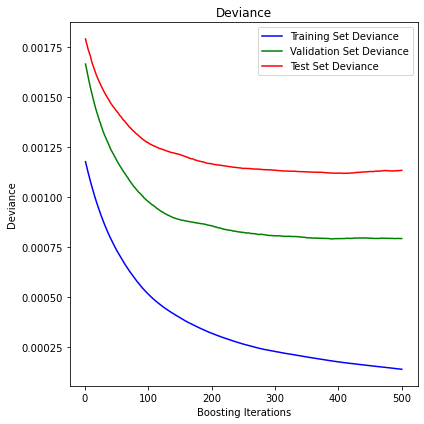

In [23]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(x_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, val_score, "g-", label="Validation Set Deviance"
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

- This graph looks normal as the deviance follows the expected order of train, validation, and test from best to worst in terms of deviance. 

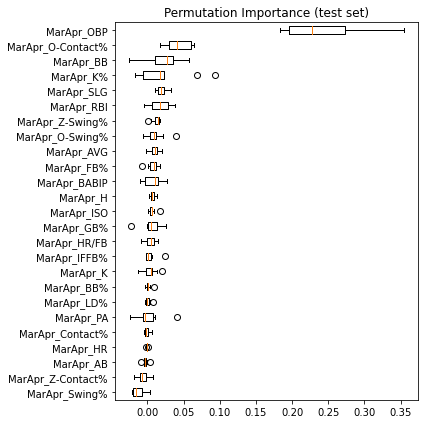

In [24]:
fig = plt.figure(figsize=(6, 6))

result = permutation_importance(
    reg, x_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 1, 1)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(inputs.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

- The most remained mostly the same compared to the validation set, but **SLG** and **RBI** creeped into the mix.

# Evaluation and Conclusion

In [25]:
from sklearn.metrics import mean_absolute_error
# evaluate model
mse = mean_squared_error(y_test, reg.predict(x_test))
mae = mean_absolute_error(y_test, reg.predict(x_test))
me = np.mean(reg.predict(x_test) - y_test)
print("The mean squared error (MSE) on test set: {:.5f}".format(mse))
print("The mean absolute error (MAE) on test set: {:.3f}".format(mae))
print("The average on test set: {:.3f}".format(me))

The mean squared error (MSE) on test set: 0.00114
The mean absolute error (MAE) on test set: 0.027
The average on test set: -0.002


In [26]:
harper_fs_obp = float(df["FullSeason_OBP"][df["Name"] == "Bryce Harper"])
harper_fs_obp

0.372

In [27]:
for i in range(len(df)):
    player_fs_obp = df["FullSeason_OBP"][i]
    player_diff = player_fs_obp - harper_fs_obp
    if (player_diff < .029) & (player_diff > .025):
        print(df["Name"][i])

Carlos Santana


In [28]:
float(df["FullSeason_OBP"][df["Name"] == "Carlos Santana"]) 

0.397

In [29]:
float(df["FullSeason_OBP"][df["Name"] == "Carlos Santana"]) - harper_fs_obp

0.025000000000000022

In [30]:
for i in range(len(df)):
    player_fs_obp = df["FullSeason_OBP"][i]
    player_diff = harper_fs_obp - player_fs_obp 
    if (player_diff < .029) & (player_diff > .025):
        print(df["Name"][i])

Alex Gordon
Eric Thames
Tommy La Stella
Edwin Encarnacion
Dexter Fowler
Paul Goldschmidt
Robinson Chirinos
Neil Walker
Miguel Cabrera


In [31]:
float(df["FullSeason_OBP"][df["Name"] == "Paul Goldschmidt"])

0.346

In [32]:
float(df["FullSeason_OBP"][df["Name"] == "Paul Goldschmidt"]) - harper_fs_obp

-0.026000000000000023

In [33]:
round(df["FullSeason_OBP"].describe(),3)

count    320.000
mean       0.326
std        0.038
min        0.209
25%        0.304
50%        0.325
75%        0.350
max        0.438
Name: FullSeason_OBP, dtype: float64

- A weakness of the model was predicting outliers where OBP < .275 or OBP > .375. This could be result of a small dataset, but I would argue that this is just shortcoming of this specific model. 
- The model seems to overpredict and underpredict at the same rate with the average prediction barely being below the true value by .002.
- The mean absolute error (MAE) is .027 which disregards over and under predictions. This difference in OBP can be represented by predicting the following player's OBP instead of predicting Bryce Harper's 2019 Full Season OBP of .372:
<br>
&nbsp; - Carlos Santana (.397, difference = .250)
<br>
&nbsp; - Paul Goldschmidt (.346, difference = -.260)

# Prediction of each player's OBP at the end of the 2019 season
Although the modleing analysis above utilizes data splitting for the train, validation, and test sets, the questionnaire asks to predict **each** player's OBP so the code below produces a csv with the player ID, player name, team, full season OBP, and predicted OBP. These predictions are contaminated because the model that is used to predict them also used 80% of the same data to train.

In [49]:
obp_preds = reg.predict(inputs)
obp_preds = [np.round(x,3) for x in obp_preds]
actual_obp = np.array(output)
obp_diff = round(output - obp_preds,3)
player_name = df["Name"]
player_id = df["playerid"]
team = df["Team"]

obp_preds = pd.Series(obp_preds)
actual_obp = pd.Series(actual_obp)
obp_diff = pd.Series(obp_diff)
player_name = pd.Series(player_name)
player_id = pd.Series(player_id)
team = pd.Series(team)

obp_predictions_2019 = pd.concat([player_id, player_name, team, actual_obp,obp_preds, obp_diff], axis=1)
obp_predictions_2019.columns = ['player_id','player_name','team','FullSeason_OBP', 'Predicted_OBP', "OBP_difference"]
obp_predictions_2019

,player_id,player_name,team,FullSeason_OBP,Predicted_OBP,OBP_difference
0,15998,Cody Bellinger,LAD,0.406,0.396,0.010
1,11477,Christian Yelich,MIL,0.429,0.382,0.047
2,17975,Scott Kingery,PHI,0.315,0.320,-0.005
3,7927,Eric Sogard,TOR,0.353,0.352,0.001
4,14130,Daniel Vogelbach,SEA,0.341,0.356,-0.015
...,...,...,...,...,...,...
315,12984,Jackie Bradley Jr.,BOS,0.317,0.307,0.010
316,9253,Keon Broxton,NYM,0.242,0.298,-0.056
317,16357,Pablo Reyes,PIT,0.274,0.268,0.006
318,6848,Eduardo Nunez,BOS,0.243,0.312,-0.069


In [53]:
obp_predictions_2019[obp_predictions_2019['team']=="PHI"]

,player_id,player_name,team,FullSeason_OBP,Predicted_OBP,OBP_difference
2,17975,Scott Kingery,PHI,0.315,0.320,-0.005
20,16472,Rhys Hoskins,PHI,0.364,0.374,-0.010
75,5933,Jean Segura,PHI,0.323,0.324,-0.001
84,11579,Bryce Harper,PHI,0.372,0.373,-0.001
102,9847,Andrew McCutchen,PHI,0.378,0.374,0.004
143,11739,J.T. Realmuto,PHI,0.328,0.343,-0.015
157,12179,Maikel Franco,PHI,0.297,0.329,-0.032
194,10556,Cesar Hernandez,PHI,0.333,0.334,-0.001


In [51]:
# export to a csv
obp_predictions_2019.to_csv("obp_predictions_2019.csv")